In [11]:
from copy import copy
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load the numpy data from a file
data = np.load("data0.npy")

# Print the shape and data type of the loaded array
print("Shape:", data.shape)
print("Data type:", data.dtype)

Shape: (302, 261, 442)
Data type: float32


359


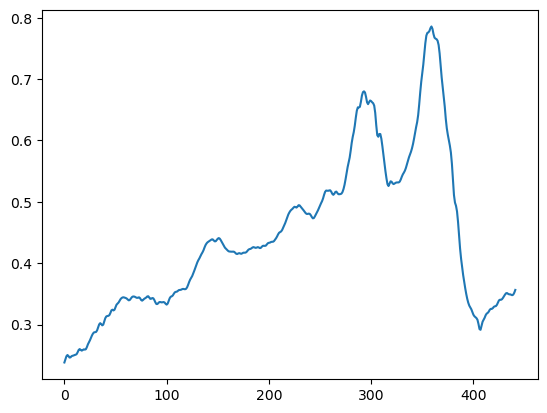

In [13]:
mean_pixel_value_every_dimension = np.mean(data,(0,1))

plt.plot(mean_pixel_value_every_dimension)

max_index_of_max_pixel_val = np.argmax(mean_pixel_value_every_dimension)

print(max_index_of_max_pixel_val)

In [14]:
#int_number_feature -> Anzahl der Wellenzahlen./Channel
#tiny ist ein kleiner floating point(1e-9 bei mir) gegen Zero-division ect.
#Bei max_wavenumber müsst ihr wie besprochen den Peak der Amid1-Bande angeben.
#Mit dem Integral müsst ihr schauen ob es so bei euch passt. Orientiert euch einfach dabei an den Masken.

def Normalize_spectral_data(image,int_number_feature, max_wavenumber=224,max_integral=100, tiny=1e-9):
	min_values = np.min(image, 2)
	max_ratio = 1/(image[:,:,max_wavenumber]-min_values + tiny)
	for wavenumber in range(int_number_feature):
		image[:,:,wavenumber] = (image[:,:,wavenumber]-min_values)*max_ratio

	mask_bad_spectra = np.trapz(image) > max_integral
	image[mask_bad_spectra,:] = tiny

	return image.astype(np.float32), mask_bad_spectra.astype(np.float32)

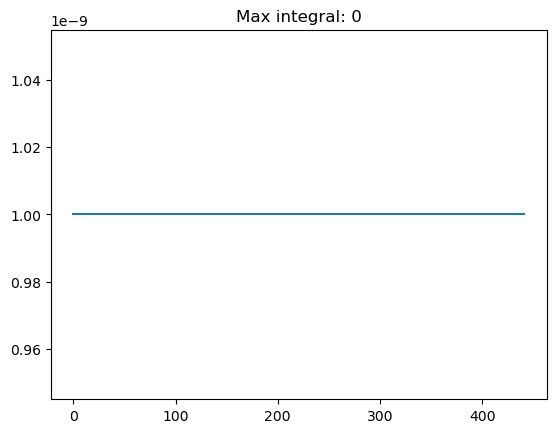

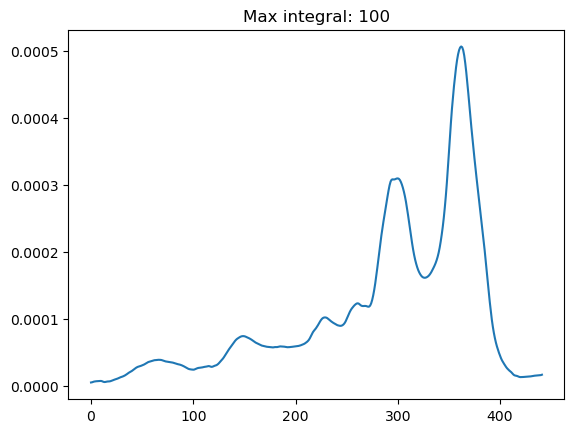

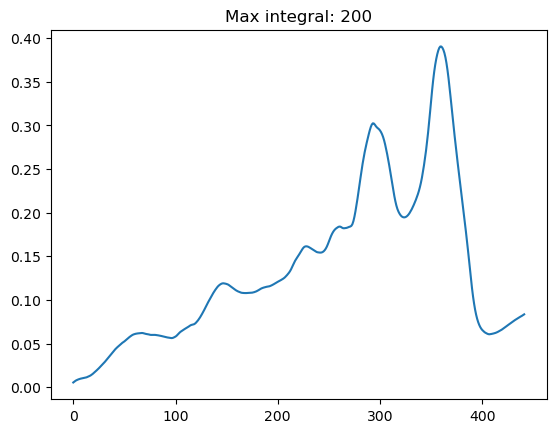

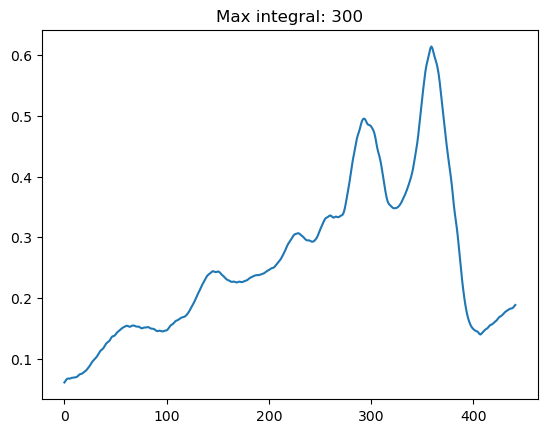

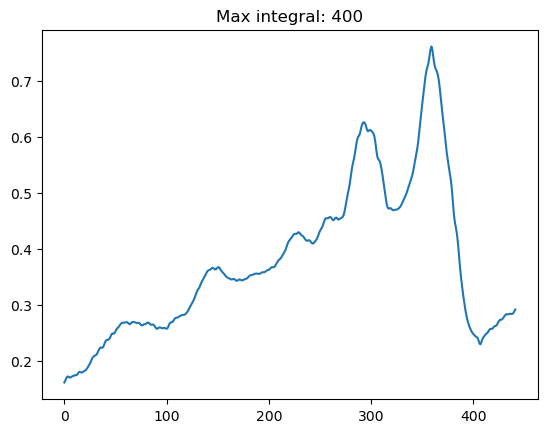

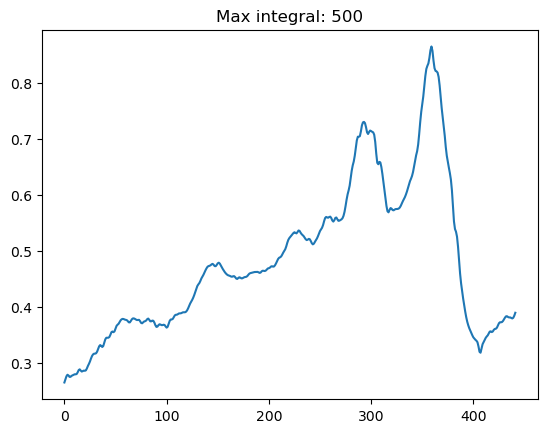

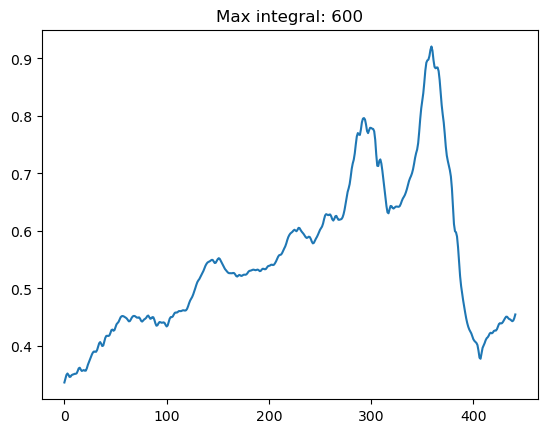

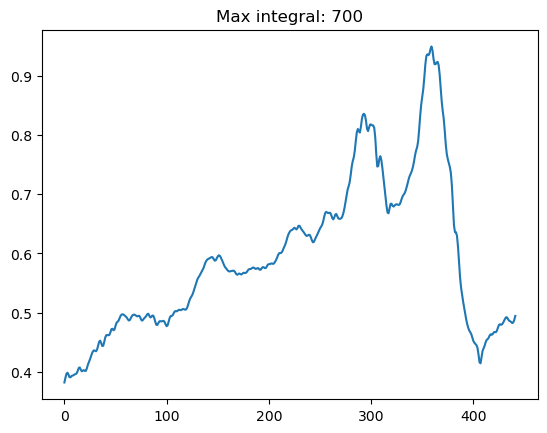

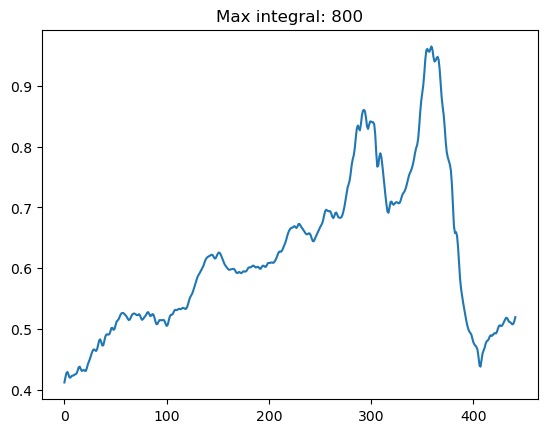

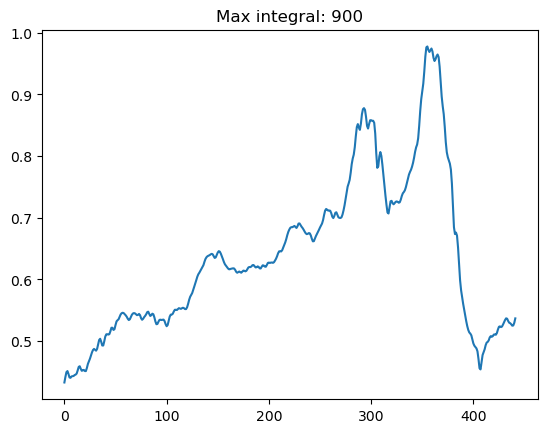

In [32]:
for i in range(0,1000,100):
	img, mask = Normalize_spectral_data(image=copy(data), int_number_feature=442, max_wavenumber=max_index_of_max_pixel_val, max_integral=i)
	plt.figure()
	title = "Max integral: "+ str(i)
	plt.title(title)
	plt.plot(np.mean(img,(0,1)))

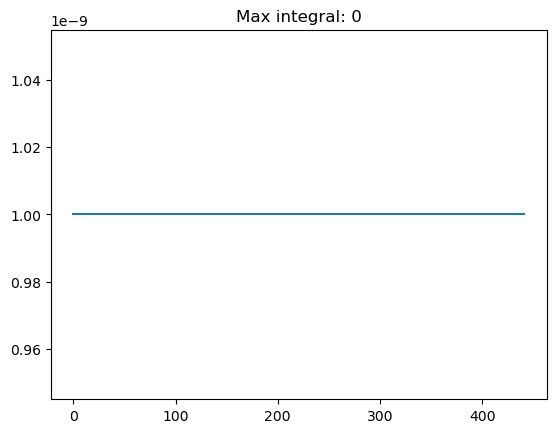

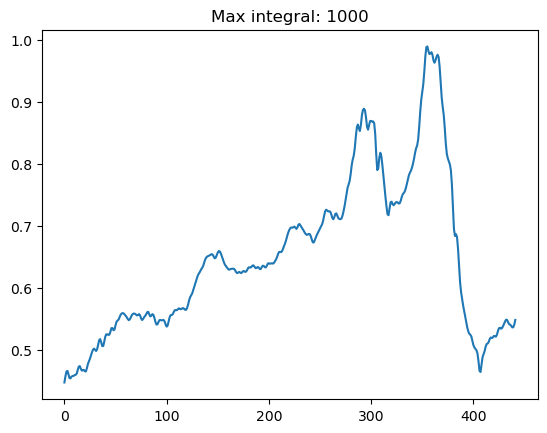

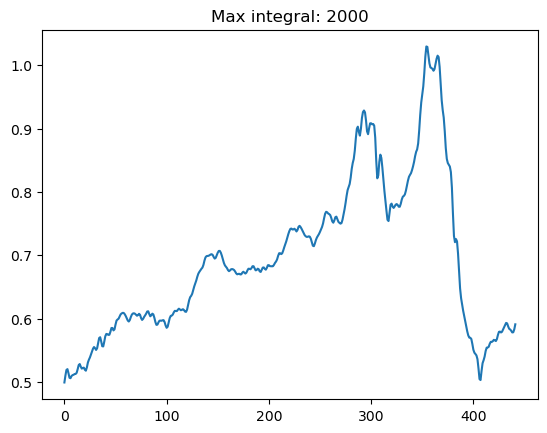

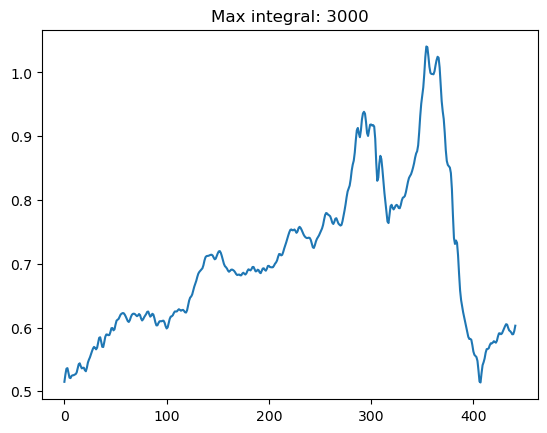

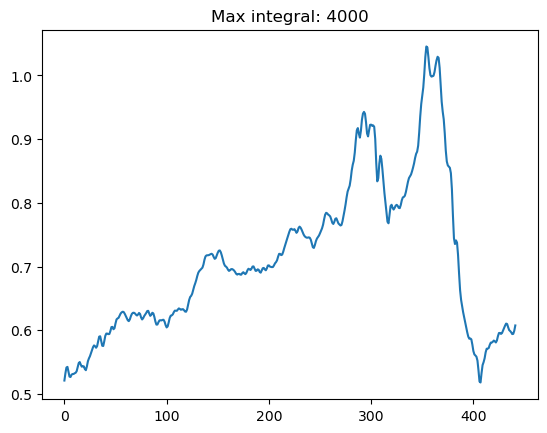

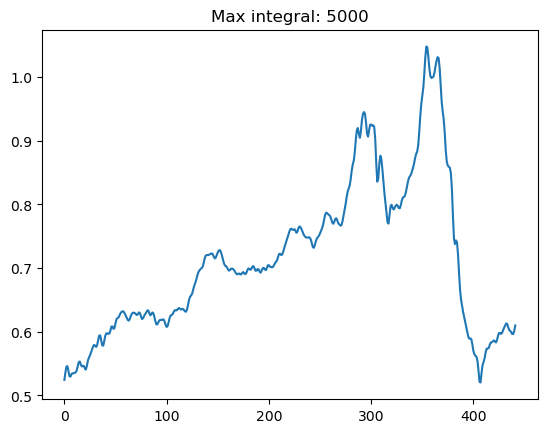

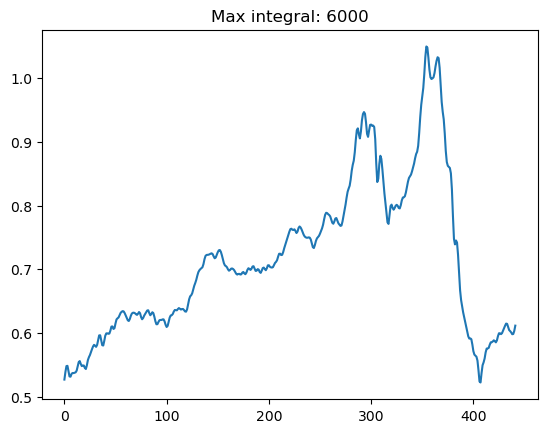

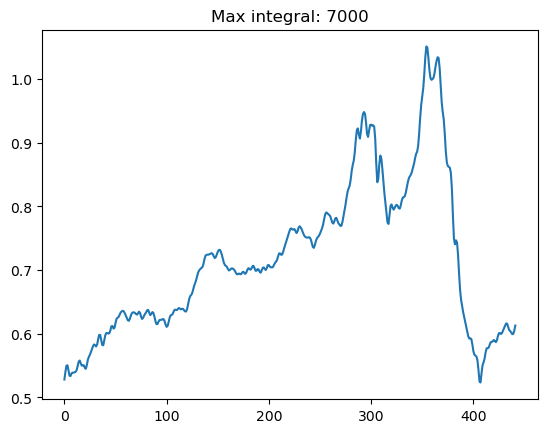

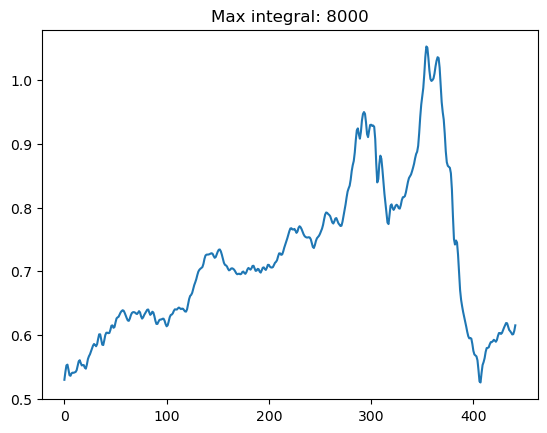

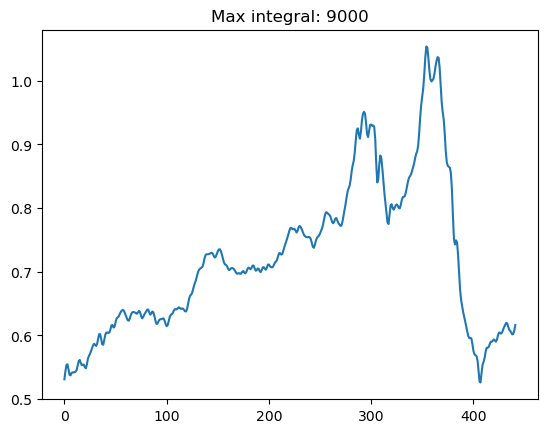

In [31]:
for i in range(0,10000,1000):
	img, mask = Normalize_spectral_data(image=copy(data), int_number_feature=442, max_wavenumber=max_index_of_max_pixel_val, max_integral=i)
	plt.figure()
	title = "Max integral: "+ str(i)
	plt.title(title)
	plt.plot(np.mean(img,(0,1)))